<a id="contents"></a>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description-of-the-project" data-toc-modified-id="Description-of-the-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description of the project</a></span></li><li><span><a href="#General-information-about-the-dataset" data-toc-modified-id="General-information-about-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General information about the dataset</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Consumer-characteristics" data-toc-modified-id="Consumer-characteristics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Consumer characteristics</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Testing-hypotheses" data-toc-modified-id="Testing-hypotheses-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testing hypotheses</a></span><ul class="toc-item"><li><span><a href="#Testing-the-first-hypothesis" data-toc-modified-id="Testing-the-first-hypothesis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Testing the first hypothesis</a></span></li><li><span><a href="#Testing-the-second-hypothesis" data-toc-modified-id="Testing-the-second-hypothesis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Testing the second hypothesis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

#  Analysis of the patterns that determine the success of computer games

## Description of the project
We analyze the sales of an online store that sells computer games all over the world. We have access to historical data on game sales, user and expert ratings, genres and platforms (such as Xbox or PlayStation). We need to identify patterns that determine the success of the game. This will allow to consider potentially popular products and plan advertising campaigns for 2017.

The dataset contains the **ESRB** rating (Entertainment Software Rating Board), an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as Adult, Younger Kids, or Teenagers.

**Data description:**
- **Name** — name of a game;
- **Platform** — name of a platform;
- **Year_of_Release** — year of realease of a game;
- **Genre** — game genre;
- **NA_sales** — sales in North America (millions of copies sold);
- **EU_sales** — sales in Europe (millions of copies sold);
- **JP_sales** — sales in Japan (millions of copies sold);
- **Other_sales** — sales in other countries (millions of copies sold;
- **Critic_Score** — critics' score (maximum 100);
- **User_Score** — user score (maximum 10);
- **Rating** — rating from ESRB.

It is also worth defining the ratings of the ESRB organization according to information from the official website https://www.esrb.org/ratings-guide/:
* **E** (Everyone) - for all ages;
* **E10+** (Everyone 10+) - from 10 years old and above;
* **T** (Teen) - from 13 years old and above;
* **M** (Mature) - from 17 years old and above;
* **AO** (Adults Only) - from 18 years old and above;
* **RP** (Rating Pending) - pending. This rating appears only in advertisements prior to the actual release of the game;
* **EC** (Early Childhood) - from 3 years old and above;
* **K-A** (Kids to Adults) - children and adults. This was the name of the E (Everyone) rating until 1998.

## General information about the dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# saving data to a data frame 
try:
    games = pd.read_csv('/datasets/games.csv') # yandex path
except:
    games = pd.read_csv('games.csv') # my path

In [3]:
# first five rows of the data frame
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# last five rows of the data frame
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# information about the data frame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# columns of the data frame
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# descriptive statistics of the variables
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [8]:
# count of games by ratings of ESRB
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [9]:
# count of games by platform
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Top 7 platforms by the number of games: PS2, DS, PS3, Wii, X360, PSP and PS.

In [10]:
# number of unique games
games['Name'].nunique()

11559

In [11]:
# count of games by genre
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Most of the games are in the action and sports genre.

In [12]:
# number of unique genres
games['Genre'].nunique()

12

Since the user score column is not numeric, we can look at unique values it contains.

In [13]:
# unique values of user score
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# number of unique values in the user score 
games['User_Score'].nunique()

96

In [15]:
# count how many 'RP' ratings are there
len(games[games['Rating']=='RP'])

3

There are 3 observations with 'RP'(rating pending) rating. 

### Conclusion
The period of release of computer games is 1980 - 2016. The table has 6 columns and 16715 rows. There are missing values in the table. Data types in the columns - year of release and user rating - are incorrect. There are zero sales for each region.

The most popular platforms are PS2 (playstation) and DS (nintendo). The table has 11,559 unique games, 12 unique genres, and 31 unique gaming platforms. The values in the ESRB Organization Rating column are categorical, representing 8 unique age ratings. The most popular games are games with age rating 'E' - for all ages. This is followed by 'T' - games for teens. 

It is also worth noting the string value 'tbd' in the user rating column. For this reason, the data type in this column is kept as 'object'. Probably the user rating is missing in such observations.

<a href="#contents">back to contents</a>

## Data preprocessing

Let's lowercase column names.

In [16]:
# using list comprehension to lowercase the column names
col_names = [i.lower() for i in games.columns.values]

In [17]:
# new column names list
col_names

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [18]:
# change column names of the dataframe
games.columns = col_names

In [19]:
# column names changed
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's check for missing values

In [20]:
# a function showing missing values and their proportion in each column
def show_nulls(df):
    null_df=df.isnull().sum()
    null_df=null_df.to_frame(name='nulls_count')
    null_percent=pd.DataFrame(round((df.isna().mean()*100), 2), columns=['nulls_percent'])
    display(null_df.join(null_percent))

In [21]:
# apply function to show missing values
show_nulls(games)

,nulls_count,nulls_percent
name,2,0.01
platform,0,0.00
year_of_release,269,1.61
genre,2,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8578,51.32
user_score,6701,40.09


There are missing values in the following columns: name, year_of_release, critic_score, user_score, and rating. The reason might be absence of rating or evaluation, or an error in loading data, since the data was taken from open sources. There following columns have a large share of missing values: user rating - 40%, critics' rating - 51% and ESRB rating - 40%.

Missing values in the name of the game (less than 1%) and year of release (1.6%) columns can be removed, as there are very few of them.

The official ESRB website has this information: "The rating system is voluntary, but all console manufacturers, as well as some US retailers and mobile or online retailers, require ESRB ratings for the games or apps they offer." Let's assume that most of the gaps in the rating column mean that there is no ESRB rating for this game, so we will not fill in the gaps in the rating column.

We will keep missing values in the user_score and critic_score columns, since it is not yet possible to somehow fill them. We can't delete these observations either, as in this case we lose a lot of data.

In [22]:
# removing missing values in the name and year_of_release columns
games = games.dropna(subset=['name', 'year_of_release'])

In [23]:
# check missing values count
show_nulls(games)

,nulls_count,nulls_percent
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8461,51.45
user_score,6605,40.17


Let's check if there are games with sales of 0 copies in all 4 regions at the same time.

In [24]:
# games with zero sales in all four regions
games[(games['na_sales']==0) & (games['eu_sales']==0) & (games['jp_sales']==0) \
& (games['other_sales']==0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


There are two observations with zero sales in all regions. And these observations also have missing values in scores and rating columns. We can delete these two observations.

In [25]:
# delete two observations
games=games.drop([16676, 16709])

Let's convert year_of_release column from a real to an integer type.

In [26]:
# convert the type to integer
games['year_of_release']=games['year_of_release'].astype('int')

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
name               16442 non-null object
platform           16442 non-null object
year_of_release    16442 non-null int64
genre              16442 non-null object
na_sales           16442 non-null float64
eu_sales           16442 non-null float64
jp_sales           16442 non-null float64
other_sales        16442 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [28]:
# count the number of rows with the value 'tbd' in the user_score column
len(games[games['user_score'] == 'tbd'])

2376

The 'tbd' values make up 14% of all observations in the user_score column (24% of non-zero observations). We can replace these values with zeros (NaN), since 'tbd' is equivalent to no value.

In [29]:
# replace 'tbd' with NaN in the user_rating 
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [30]:
# 'tbd' successfully replaced
len(games[games['user_score'] == 'tbd'])

0

Now we can change user_score column type from object to a numeric type.

In [31]:
# convert user_score to numeric type
games['user_score'] = pd.to_numeric(games['user_score'])

In [32]:
# user_score type changed to float type
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
name               16442 non-null object
platform           16442 non-null object
year_of_release    16442 non-null int64
genre              16442 non-null object
na_sales           16442 non-null float64
eu_sales           16442 non-null float64
jp_sales           16442 non-null float64
other_sales        16442 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [33]:
# descriptional stats of user_rating
games[['user_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
user_score,7463.0,7.12633,1.499447,0.0,6.4,7.5,8.2,9.7


Let's create a column with total sales in all regions.

In [34]:
# new 'total_sales' column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [35]:
# descriptional stats of 'total_sales' 
games[['total_sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_sales,16442.0,0.536089,1.558869,0.01,0.06,0.17,0.47,82.54


In [36]:
# check for duplicates
games.duplicated().sum()

0

There are no duplicates.

### Conclusion
Column names have been converted to lowercase. Observations with missing values in the name and year_of_release columns have been removed. The year_of_release was converted to an integer type. Missing values in user_score, critic_score and rating were kept. The 'tbd' values in the user_score column were replaced with NaN and the column was converted to a numeric type. We deleted two observations with 0 sales in all regions.

<a href="#contents">back to contents</a>

## Exploratory data analysis

In [37]:
# Pearson correlation matrix
games.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.0923173,0.00405384,-0.168471,0.0378293,0.011411,-0.267851,-0.0762104
na_sales,-0.0923173,1,0.766544,0.451157,0.638476,0.240083,0.0855492,0.941241
eu_sales,0.00405384,0.766544,1,0.435889,0.722677,0.221276,0.0555299,0.901672
jp_sales,-0.168471,0.451157,0.435889,1,0.291557,0.153474,0.126372,0.613301
other_sales,0.0378293,0.638476,0.722677,0.291557,1,0.19841,0.0569351,0.748928
critic_score,0.011411,0.240083,0.221276,0.153474,0.19841,1,0.579671,0.245349
user_score,-0.267851,0.0855492,0.0555299,0.126372,0.0569351,0.579671,1,0.087984
total_sales,-0.0762104,0.941241,0.901672,0.613301,0.748928,0.245349,0.087984,1


There is a high positive correlation between sales in North America, sales in Europe, sales in other countries, and total sales. Sales in Japan are only positively correlated with total sales. Critic_score and user_score do not correlate strongly with any other variable.

Let's see how many games were released during different years.

In [38]:
# pivot table with the number of games in each year
games.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


The number of games released during some years is negligible, for example, 9 games in 1980. Until 1991, fewer than 20 games were released annually, with the exception of 1981, 1982, and 1986. Until 1994, fewer than 100 games were released annually. Since 1994, the number of games released annually has never been less than 100.

Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution over the years. Let's also reveal the typical lifetime of the platform.

In [39]:
# pivot table with total sales by platform 
platforms_sales = games.pivot_table(index='platform', aggfunc={'total_sales':'sum'})\
.sort_values(by='total_sales', ascending=False).reset_index()
platforms_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Let's take the first 6 platforms for analysis over the years, since sales decrease sharply after the 6th platform. Top 6 platforms by total sales are PS2, X360, PS3, Wii, DS and PS.

In [40]:
# save the top 6 platforms to the list
top_plat = list(platforms_sales[:6]['platform'])
top_plat

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [41]:
# data frame with top platforms
top_platform = games.query('platform in @top_plat')

In [42]:
# number of games by top platforms
top_platform['platform'].value_counts()

PS2     2126
DS      2121
PS3     1305
Wii     1286
X360    1232
PS      1190
Name: platform, dtype: int64

In [43]:
# pivot table with total sales for top platforms over years
top_platform_piv = top_platform.pivot_table(index=['year_of_release', 'platform'], aggfunc={'total_sales':'sum'})\
.unstack(level=-1)
top_platform_piv

total_sales                                        
platform                 DS      PS     PS2     PS3     Wii    X360
year_of_release                                                    
1985                   0.02     NaN     NaN     NaN     NaN     NaN
1994                    NaN    6.03     NaN     NaN     NaN     NaN
1995                    NaN   35.96     NaN     NaN     NaN     NaN
1996                    NaN   94.70     NaN     NaN     NaN     NaN
1997                    NaN  136.17     NaN     NaN     NaN     NaN
1998                    NaN  169.49     NaN     NaN     NaN     NaN
1999                    NaN  144.53     NaN     NaN     NaN     NaN
2000                    NaN   96.37   39.17     NaN     NaN     NaN
2001                    NaN   35.59  166.43     NaN     NaN     NaN
2002                    NaN    6.67  205.38     NaN     NaN     NaN
2003                    NaN    2.07  184.31     NaN     NaN     NaN
2004                  17.27     NaN  211.81     NaN     NaN     NaN
2005                 130.14     NaN  160.66     NaN     NaN    8.25
2006                 119.81     NaN  103.42   20.96  137.15   51.62
2007                 146.94     NaN   75.99   73.19  152.77   95.41
2008                 145.31     NaN   53.90  118.52  171.32  135.26
2009                 119.54     NaN   26.40  130.93  206.97  120.29
2010                  85.02     NaN    5.64  142.17  127.95  170.03
2011                  26.18     NaN    0.45  156.78   59.65  143.84
2012                  11.01     NaN     NaN  107.36   21.71   99.74
2013                   1.54     NaN     NaN  113.25    8.59   88.58
2014                    NaN     NaN     NaN   47.76    3.75   34.74
2015                    NaN     NaN     NaN   16.82    1.14   11.96
2016                    NaN     NaN     NaN    3.60    0.18    1.52

In [44]:
# get rid of multi-index
top_platform_piv.columns = top_platform_piv.columns.droplevel(0)

In [45]:
# reset index
top_platform_piv = top_platform_piv.reset_index()
top_platform_piv

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN


 We see that in 1985 the only platform used was DS platform. Then there were no sales on DS until 2004. From 2004, sales of DS resumed again and continued until 2013. From 1994 to 2003, the PS platform was the leading platform. From 2000 to 2011 we observe sales on the PS2 platform. Since 2005, sales on the X360 platform began. Since 2006, sales started on the PS3 and Wii platforms.

In [46]:
# replace NaNs with zeroes
top_platform_piv = top_platform_piv.replace(np.nan, 0)

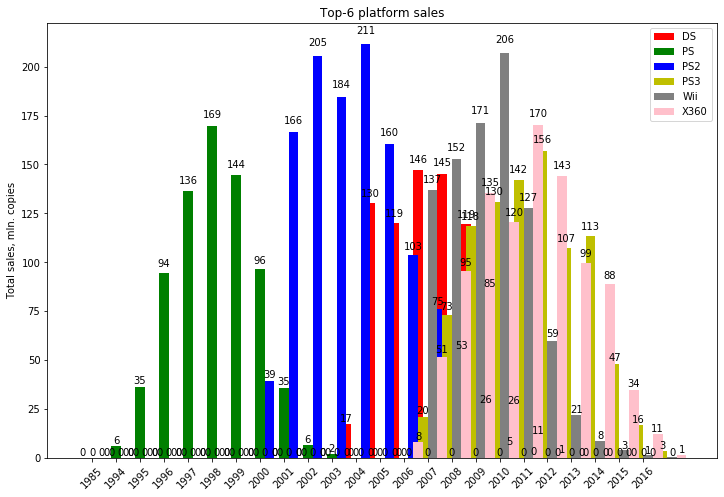

In [47]:
# bar chart of total sales over the years and platforms
N = 24              # number of years in our data
ind = np.arange(N)  # number of ticks on x-axis for each platform 
width = 0.4         # bin width

x_year = top_platform_piv['year_of_release']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ds = top_platform_piv['DS']
bar1 = ax.bar(ind, ds, width, color='r')
ps = top_platform_piv['PS']
bar2 = ax.bar(ind+width, ps, width, color='g')

ps2 = top_platform_piv['PS2']
bar3 = ax.bar(ind+width*2, ps2, width, color='b')

ps3 = top_platform_piv['PS3']
bar4 = ax.bar(ind+width*3, ps3, width, color='y')

wii = top_platform_piv['Wii']
bar5 = ax.bar(ind+width*4, wii, width, color='grey')

x360 = top_platform_piv['X360']
bar6 = ax.bar(ind+width*5, x360, width, color='pink')

ax.set_title('Top-6 platform sales')
ax.set_ylabel('Total sales, mln. copies')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x_year), rotation=45 )
ax.legend( (bar1[0], bar2[0], bar3[0], bar4[0], bar5[0], bar6[0]), ('DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360') )
 
def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2., 1.02*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()

The chart shows total sales by year, with the height of each color block showing sales in millions of copies. We see that from 1994 to 2000 the PS platform prevailed. Then sales began on the PS2, DS, X360, Wii and PS3 platforms. Typical platform life cycle is 10-12 years.

In [48]:
# pivot table with the number of unique platforms in each year
games.pivot_table(index='year_of_release', values='platform', aggfunc=lambda x: len(x.unique()))

,platform
year_of_release,
1980,1
1981,1
1982,1
1983,2
1984,2
1985,4
1986,2
1987,2
1988,4


The maximum number of platforms for which sales were made is 11, the minimum is 1 platform.

<a href="#contents">back to contents</a>

For the actual period, we take data for the last 3 years, from 2013 to 2016. Let's see which platforms are leading in terms of sales.

In [49]:
# filter out the data frame to include year from 2013
games_actual = games.query('year_of_release > 2012')

In [50]:
# data frame with actual period
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [51]:
# info on actual data frame
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             1256 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [52]:
# convert sales into thousand copies
games_actual['total_sales_thousands'] = games_actual['total_sales']*1000

In [53]:
# pivot table  with total sales by platform 
games_actual_piv = games_actual.pivot_table(index=['year_of_release', 'platform'], aggfunc={'total_sales':'sum'})\
.unstack(level=-1)

In [54]:
# get rid of multi-index
games_actual_piv.columns = games_actual_piv.columns.droplevel(0)

In [55]:
# replace NaNs with zeros
games_actual_piv = games_actual_piv.replace(np.nan, 0)

In [56]:
# reset index
games_actual_piv = games_actual_piv.reset_index()

In [57]:
# pivot table for the actual period 2013-2016
games_actual_piv

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


During the actual period there were sales on 11 platforms.

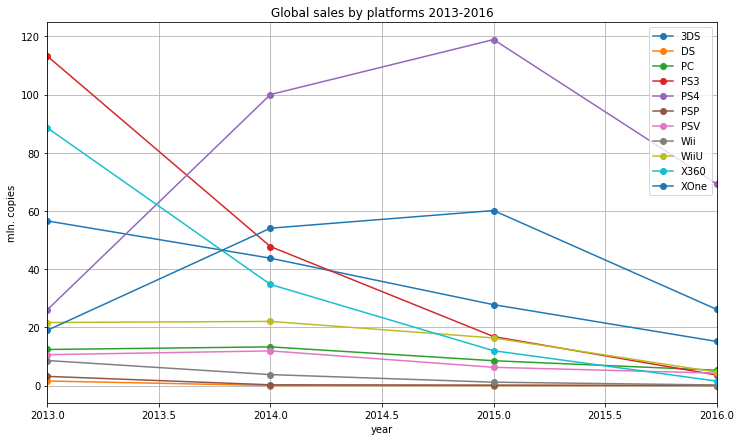

In [58]:
# Line graph of total sales by platforms for the actual period
games_actual_piv.plot(title='Global sales by platforms 2013-2016', style='o-', grid=True, figsize=(12,7), 
                      x='year_of_release')
plt.legend()
plt.xlabel('year')
plt.ylabel('mln. copies')
plt.show()

PS4 and XOne platforms are leading in sales and showing growth. Sales for PS3, X360, 3DS platforms have dropped significantly in recent years. Sales on other platforms decreased as well. In general, we observe a downward trend in sales across all platforms in recent years.

We can assume that PS4 and XOne are potentially profitable platforms. Let's build boxplot for global sales of games on these platforms.

In [59]:
# function to create a boxplot
def my_plot(df, col, name):
    plt.figure(figsize =(8, 2))
    plt.boxplot(df[col],
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.15, 
            patch_artist = True)
    plt.title('Boxplot for total sales on ' + name)
    plt.xlabel('thousands of copies')
    plt.tick_params(axis = 'both',   
               which = 'major',    
               direction = 'inout',    
               length = 16,    
               width = 2,     
               color = 'm',    
               pad = 10,    
               labelsize = 10,    
               labelcolor = 'b')    
    plt.grid()
    plt.show()

In [60]:
# data frame for PS4 platform only
ps4 = games_actual.query('platform == "PS4"')

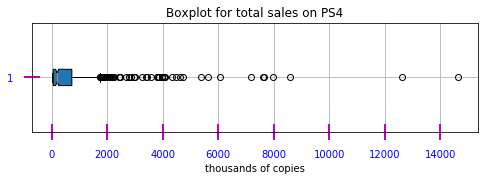

In [61]:
# boxplot for PS4 sales
my_plot(ps4, 'total_sales_thousands', 'PS4')

The values cut off by the right whisker are rare and there are many of them. It can be seen that the median does not tend to the long tail of large values. The median of sales of games on the PS4 platform is about 200 thousand copies.

In [62]:
# data frame with XOne platform
xone = games_actual.query('platform == "XOne"')

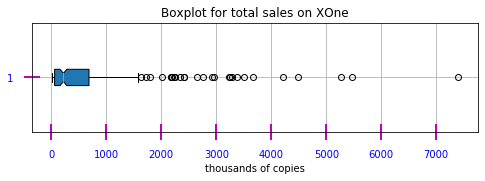

In [63]:
my_plot(xone, 'total_sales_thousands', 'XOne')

We see rare values that were cut off by the right whisker. The median does not tend to the long tail of large values. The median of sales of games on the platform is about 230 thousand copies.

The interquartile range is larger for the PS4 platform.

Let's see how user_score and critic_score affect sales of games on the PS4 platform.

In [64]:
# Pearson correlation between total_sales and user- and critic_score
ps4[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



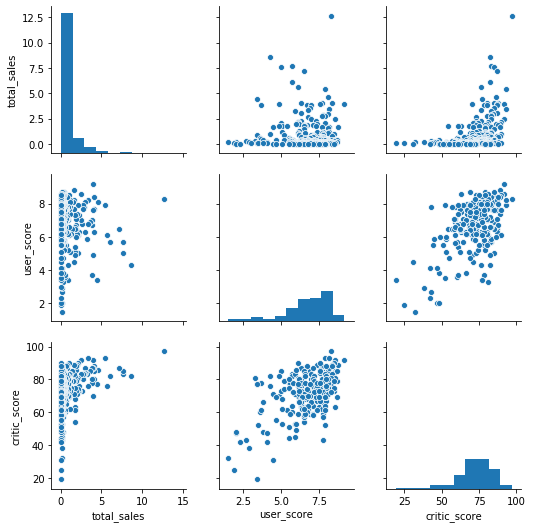

In [65]:
# pairplot for total_sales, user_score and critic_score
sns.pairplot(ps4[['total_sales', 'user_score', 'critic_score']], diag_kind="hist")
plt.show()

User_score is positively correlated with critic_score (0.56). There is a slight positive correlation (0.41) between sales and critic_score. There is no correlation between sales and user_score.

Now let's see how user_score and critic_score affect game sales on the XOne platform.

In [66]:
# Pearson correlation between total_sales and user- and critic_score
xone[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


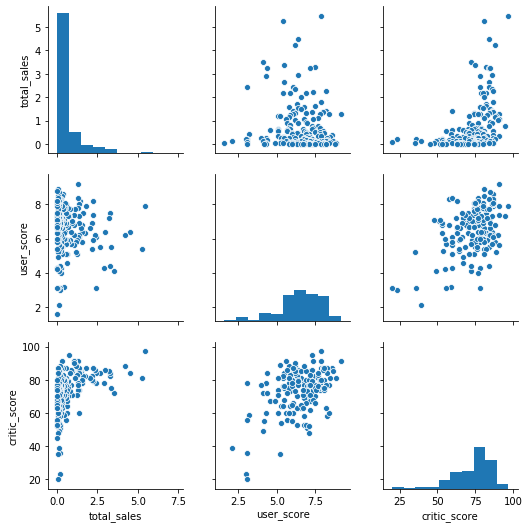

In [67]:
# pairplot for total_sales, user_score and critic_score
sns.pairplot(xone[['total_sales', 'user_score', 'critic_score']], diag_kind="hist")
plt.show()

There is a slight positive correlation between critic_score and user_score (0.47). There is also a small positive correlation (0.42) between sales and critic_score. There is no correlation between sales and user_score.

In general, we observe a similar impact of user_score and critic_score on game sales on PS4 and XOne platforms: there is a small positive correlation between sales and critic_score.

Let's look at sales and the overall distribution of games by genre.

In [68]:
# pivot table with games count and total sales by genre 
games_actual_genre = games_actual.pivot_table(index='genre', aggfunc={'name':'count', 'total_sales':'sum'})\
.reset_index()

In [69]:
# change column names and show the pivot table
games_actual_genre.columns = ['genre', 'game_count', 'total_sales']
games_actual_genre = games_actual_genre.sort_values(by='game_count', ascending=False)
games_actual_genre

,genre,game_count,total_sales
0,Action,766,321.87
7,Role-Playing,292,145.89
1,Adventure,245,23.64
10,Sports,214,150.65
8,Shooter,187,232.98
3,Misc,155,62.82
6,Racing,85,39.89
2,Fighting,80,35.31
4,Platform,74,42.63
9,Simulation,62,21.76


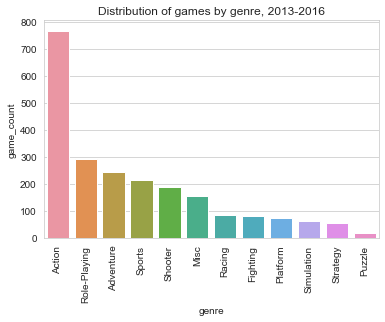

In [70]:
# bar plot for games by genre 
sns.set_style('whitegrid')
ax = sns.barplot(x='genre', y='game_count', data=games_actual_genre)
ax.set_title('Distribution of games by genre, 2013-2016')
ax.set_xticklabels(games_actual_genre['genre'], rotation=90)
plt.show()

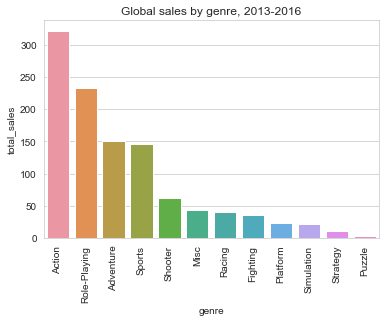

In [71]:
# bar plot for total sales by genre 
sns.set_style('whitegrid')
ax = sns.barplot(x='genre', y='total_sales', data=games_actual_genre.sort_values(by='total_sales', ascending=False))
ax.set_title('Global sales by genre, 2013-2016')
ax.set_xticklabels(games_actual_genre['genre'], rotation=90)
plt.show()

Over the actual period 2013-2016, we observe most of the games in the Action genre, followed by Role-Playing genre. Least games - in the Puzzle genre. 

The Action genre also has the highest sales, followed by the Shooter genre. The Puzzle genre has the lowest sales.

### Conclusion
 We identified the top 6 platforms by total sales for the entire period: PS2, X360, PS3, Wii, DS and PS. From 1994 to 2000, the PS platform prevailed. We found out that the typical platform life cycle is 10-12 years.

For the current period 2013-2016, the PS4 and XOne platforms were leading platforms by sales and showed good growth. Sales for PS3, X360, 3DS platforms dropped significantly over this period. In general, there is a downward trend in sales across all platforms. Thus, PS4 and XOne are platforms with high potential. From the boxplot, it was found that the interquartile range is higher for the PS4 platform, and the median of sales is higher for the XOne platform.

We see a similar effect of user_score and critic_score on game sales on PS4 and XOne platforms: there is a slight positive correlation between sales and critic_score.

Over the current period, most games are in the Action genre, least - in the Puzzle genre. The Action genre also has the highest sales. The Puzzle genre has the lowest sales.

<a href="#contents">back to contents</a>

## Consumer characteristics

Let's find out the most popular platforms for each region.

In [72]:
# pivot table with total sales by platforms and regions
games_region = games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.reset_index()

In [73]:
# pivot table
games_region.head()

,platform,eu_sales,jp_sales,na_sales
0,2600,4.86,0.00,80.78
1,3DO,0.00,0.10,0.00
2,3DS,61.27,100.62,82.65
3,DC,1.69,8.56,5.43
4,DS,188.41,175.02,380.31


In [74]:
# top-5 platforms for North America
games_region_na = games_region.sort_values(by='na_sales', ascending=False)[['platform', 'na_sales']].head()
games_region_na

,platform,na_sales
28,X360,595.74
16,PS2,572.92
26,Wii,486.87
17,PS3,390.13
4,DS,380.31


In [75]:
# top-5 platforms for Europe
games_region_eu = games_region.sort_values(by='eu_sales', ascending=False)[['platform', 'eu_sales']].head()
games_region_eu

,platform,eu_sales
16,PS2,332.63
17,PS3,327.21
28,X360,268.32
26,Wii,258.32
15,PS,212.39


In [76]:
# top-5 platforms for Japan
games_region_jp = games_region.sort_values(by='jp_sales', ascending=False)[['platform', 'jp_sales']].head()
games_region_jp

,platform,jp_sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
2,3DS,100.62


In [77]:
# function to build a pie chart
def my_pie(df, col, region):
    df.plot(kind='pie', y=col, figsize=(7, 7), labels=df['platform'], autopct='%1.1f%%')
    plt.title('Distribution of sales by platform, ' + region)
    plt.show()

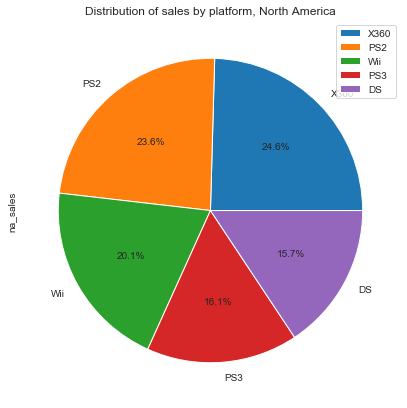

In [78]:
# pie chart for North America region
my_pie(games_region_na, 'na_sales', 'North America')

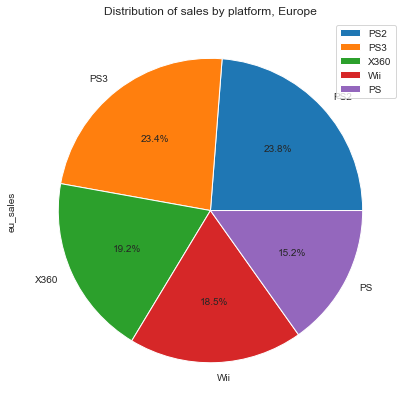

In [79]:
# pie chart for EU region
my_pie(games_region_eu, 'eu_sales', 'Europe')

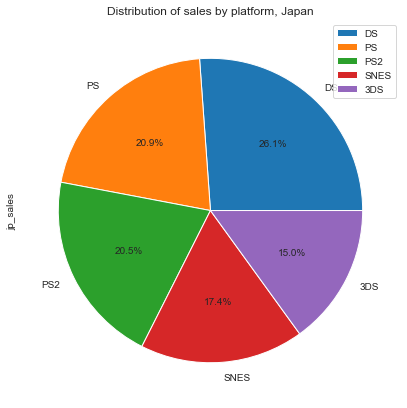

In [80]:
# pie chart for Japan
my_pie(games_region_jp, 'jp_sales', 'Japan')

North America is dominated by the X360, PS2 and Wii platforms, each with a share slightly over 20%. In Europe, the PS2 and PS3 platforms are leading in sales - the share of each is also slightly more than 20%. In Japan, the leading platform is DS (26.1%), PS (20.9%) and PS2 (20.5%). Overall, PS2 is very popular in all regions. In North America, Microsoft is the leader. In Europe, the most popular manufacturer is Sony. Nintendo is popular in Japan.

Now let's define the most popular genres for users of each region (NA, EU, JP).

In [81]:
# pivot table with total sales by genre and region
games_genre = games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], \
aggfunc='sum').reset_index()

In [82]:
# pivot table
games_genre

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Action,510.99,160.14,863.17,1716.52
1,Adventure,63.20,52.24,101.52,233.33
2,Fighting,99.00,87.28,220.51,442.66
3,Misc,210.60,107.02,399.57,790.29
4,Platform,199.39,130.71,444.44,825.55
5,Puzzle,49.78,56.68,121.13,239.89
6,Racing,234.49,56.63,356.86,723.49
7,Role-Playing,188.24,353.39,330.04,931.08
8,Shooter,314.52,38.68,584.83,1041.36
9,Simulation,113.35,63.64,180.40,387.96


In [83]:
# top-5 genres by total sales
games_genre.sort_values(by='total_sales', ascending=False)[['genre', 'total_sales']].head()

,genre,total_sales
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55


Let's create tables with top-5 genres by sales for each region.

In [84]:
# top-5 genres for North America
games_genre_na = games_genre.sort_values(by='na_sales', ascending=False)[['genre', 'na_sales']].head()
games_genre_na

,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [85]:
# top-5 genres for Europe
games_genre_eu = games_genre.sort_values(by='eu_sales', ascending=False)[['genre', 'eu_sales']].head()
games_genre_eu

,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [86]:
# top-5 genres for Japan
games_genre_jp = games_genre.sort_values(by='jp_sales', ascending=False)[['genre', 'jp_sales']].head()
games_genre_jp

,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


In [87]:
# function to build a pie chart of sales by genre
def my_pie_gen(df, col, region):
    df.plot(kind='pie', y=col, figsize=(7, 7), labels=df['genre'], autopct='%1.1f%%')
    plt.title('Distribution of sales by genre, ' + region)
    plt.show()

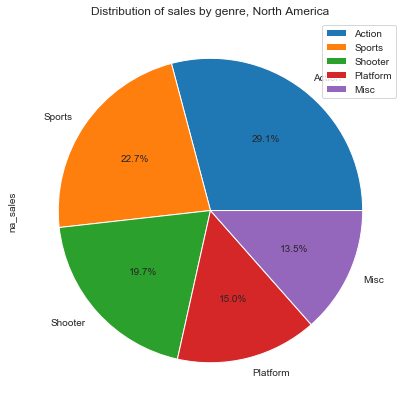

In [88]:
# pie chart for North America
my_pie_gen(games_genre_na, 'na_sales', 'North America')

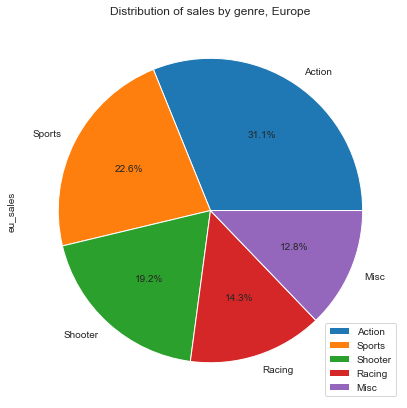

In [89]:
# pie chart for EU
my_pie_gen(games_genre_eu, 'eu_sales', 'Europe')

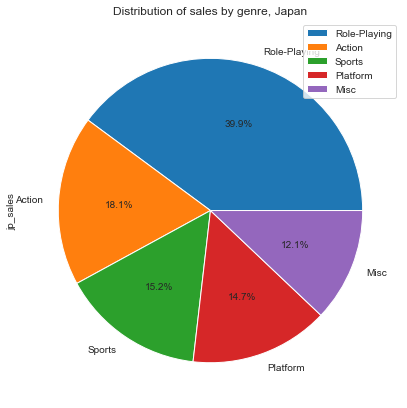

In [90]:
# pie chart for Japan
my_pie_gen(games_genre_jp, 'jp_sales', 'Japan')

The Action genre is leading in North America (29.1%) and Europe (31.1%), followed by Sports with just over 20% in both regions. In Japan, Role-Playing is the leading genre (39.9%), followed by Action (18.1%). North America and Europe are similar in preferences for genres of computer games.

Let's see if the ESRB rating affects sales in a particular region.

In [91]:
# pivot table with total sales by rating category across regions
games_rating = games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.reset_index()

In [92]:
# pivot table
games_rating

,rating,eu_sales,jp_sales,na_sales
0,AO,0.61,0.00,1.26
1,E,703.87,197.96,1274.24
2,E10+,183.35,40.20,345.50
3,EC,0.11,0.00,1.53
4,K-A,0.27,1.46,2.56
5,M,480.00,63.58,742.89
6,RP,0.03,0.00,0.00
7,T,421.79,150.70,747.60


Most of the games sold in all 3 regions are rated "E" (for all ages).

Let's build bar charts for total sales by ESRB rating for three regions.

In [93]:
# function to build a bar chart
def my_bar(col, region):
    sns.set_style('whitegrid')
    f, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=col, y='rating', data=games_rating, label="Total", color='purple') 
    ax.set_title('Sales by ESRB rating for ' + region)

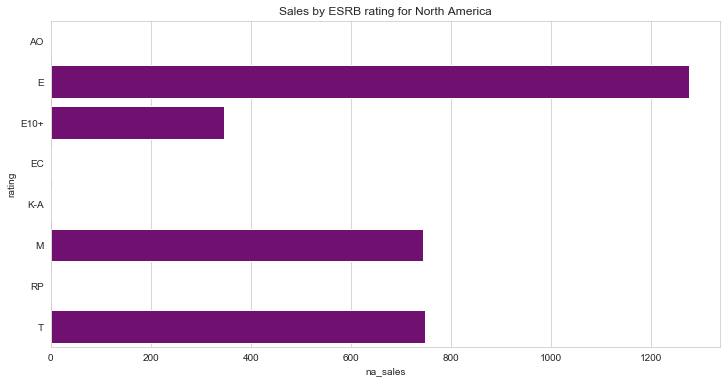

In [94]:
# bar chart for North America region
my_bar('na_sales', 'North America')

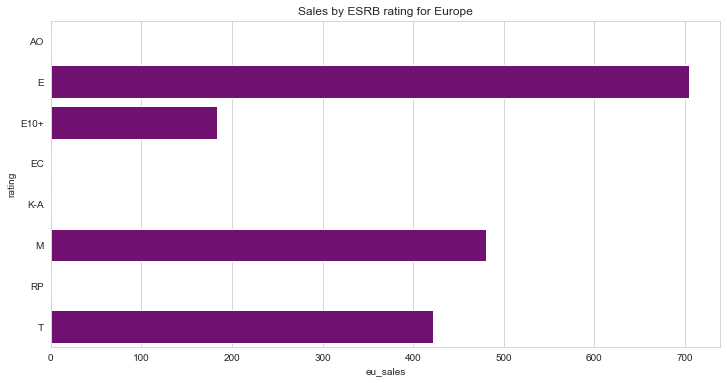

In [95]:
# bar chart for Europe
my_bar('eu_sales', 'Europe')

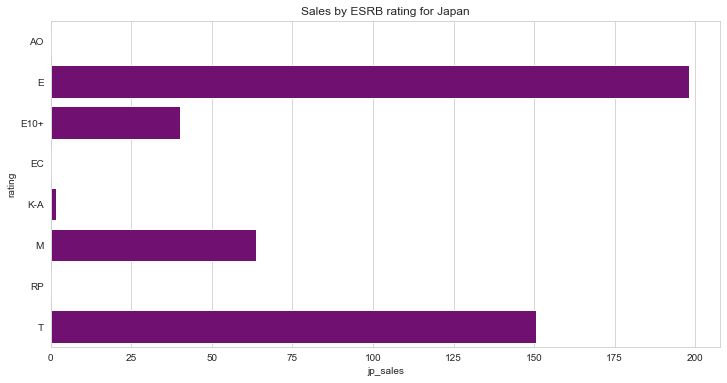

In [96]:
# bar chart for Japan
my_bar('jp_sales', 'Japan')

 We see that most of the games sold are 'E' category in all regions. This is followed by the 'M' and 'T' categories. 'AO' sales are a minority in North America and Europe, and are absent in Japan.

To assess the impact of a rating on sales, we need to turn the rating into numerical values. To do this, we can categorize the rating. For each rating category, we assign a number in ascending order that matches age. The category 'E' can be assigned 0.

First, let's filter out missing values and observations with the 'RP' value.

In [97]:
# filter out 'RP' values
games_filtered_rating = games.query('rating.notnull() and rating != "RP"')

In [98]:
# function to assign a number to the rating category
def rating_cat(rating):
    if (rating == 'E') or (rating == 'K-A') :
        return 0

    if rating == 'EC':
        return 3
        
    if rating == 'E10+':
        return 10
    
    if rating == 'T':
        return 13
    
    if rating == 'M':
        return 17
   
    return 18
    

In [99]:
# apply function to create a new column with rating number
games_filtered_rating['rating_cat'] = games_filtered_rating['rating'].apply(rating_cat)

In [100]:
# new column created
games_filtered_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_cat
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,0


Let's create a dictionary for the rating numbers.

In [101]:
# dictionary
games_filtered_rating_dict = games_filtered_rating[['rating', 'rating_cat']]

In [102]:
#remove duplicates
games_filtered_rating_dict = games_filtered_rating_dict.drop_duplicates().reset_index(drop=True)
games_filtered_rating_dict.sort_values(by='rating_cat')

,rating,rating_cat
0,E,0
4,K-A,0
6,EC,3
3,E10+,10
2,T,13
1,M,17
5,AO,18


We can now calculate the correlation to assess the impact of the ESRB rating on sales.

In [103]:
# Pearson correlation between rating category and sales in all three regions
games_filtered_rating[['na_sales', 'eu_sales', 'jp_sales', 'rating_cat']].corr().style.background_gradient('rainbow')

,na_sales,eu_sales,jp_sales,rating_cat
na_sales,1,0.838777,0.469433,0.0181245
eu_sales,0.838777,1,0.52078,0.0312013
jp_sales,0.469433,0.52078,1,-0.0108759
rating_cat,0.0181245,0.0312013,-0.0108759,1


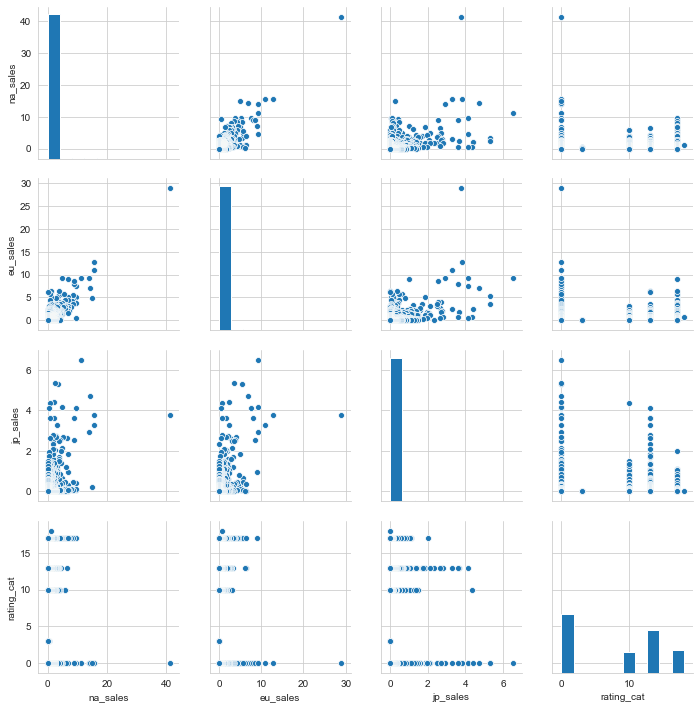

In [104]:
# pairplot with histograms and scatterplots
sns.pairplot(games_filtered_rating[['na_sales', 'eu_sales', 'jp_sales', 'rating_cat']], diag_kind="hist")
plt.show()

We see that most of sales are on games with ESRB rating of 0, which means 'for all age categories'.

### Conclusion
We have identified the most popular platforms and genres for the entire period under review. North America is dominated by the X360, PS2, Wii, PS3 and DS platforms. In Europe, PS2, PS3, X360, Wii and PS platforms are leading in sales. In Japan, the leading platforms are DS, PS, PS2, SNES and 3DS. The PS2 platform is among the top-rated platforms in all three regions. The Action genre is popular in all three regions.

The majority of games sold are 'E' age category in all three regions. 'AO' age category game sales are a minority in North America and Europe, with no sales at all in Japan. Most of sales are on games with ESRB rating of 0, which means 'for all age categories'.

<a href="#contents">back to contents</a>

## Testing hypotheses 

Let's check several hypotheses:

* *1. Average user_score for Xbox One and PC platforms are the same;*
* *2. Average user_score for Action and Sports genres are different.*

### Testing the first hypothesis

First, let's examine the mean, variance and standard deviation for two samples - Xbox One и PC.

In [105]:
# table with XOne and PC platform with missing values in user_score filtered out 
games_2platf = games.query('user_score.notnull() and (platform=="XOne" or platform=="PC")')

In [106]:
# 937 observations left
games_2platf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 85 to 16705
Data columns (total 12 columns):
name               937 non-null object
platform           937 non-null object
year_of_release    937 non-null int64
genre              937 non-null object
na_sales           937 non-null float64
eu_sales           937 non-null float64
jp_sales           937 non-null float64
other_sales        937 non-null float64
critic_score       853 non-null float64
user_score         937 non-null float64
rating             889 non-null object
total_sales        937 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 95.2+ KB


In [107]:
# mean, standard deviation and variance for two platforms
games_2platf.pivot_table(index='platform', values='user_score', aggfunc=['mean', 'std', 'var']).round(1)

,mean,std,var
,user_score,user_score,user_score
platform,,,
PC,7.1,1.5,2.3
XOne,6.5,1.4,1.9


Averages, variance and standard deviation of user_score do not differ much.

Let's construct histograms, KDE curves (Kernel Density Estimation), as well as QQ-plot to determine the normality of the data distribution.

In [108]:
# function to create a histogram, kde curve and QQ-plot
def my_hist(df, col, bins, df_name):
    plt.figure(figsize =(6, 4))
    hist = df[col].plot(
                kind='hist', 
                bins=bins, 
                alpha=0.9, 
                ec='black',
                color='skyblue',
                )
    plt.axvline(x=df[col].median(),
                linewidth=2, 
                color='red', 
                linestyle='--', 
                label='median')
    plt.axvline(x=df[col].quantile(.05),
                linewidth=2, 
                color='gold', 
                linestyle='--', 
                label='5 quantile')
    plt.axvline(x=df[col].quantile(.95),
                linewidth=2, 
                color='gold', 
                linestyle='--',
                label='95 quantile')
    plt.title('Distribution of ' + col + ' for platform ' + df_name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.figure(figsize =(6, 4))
    kdeplot = df[col].plot(
                kind='kde', 
                alpha=0.5,
                color='skyblue',
                )
    plt.title('Distribution of ' + col + ' for platform ' + df_name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    #проверка на нормальность распределения;
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], line='s')
    plt.title('Proximity to normal distribution (red line)', fontsize=12, color='black')
    plt.show()
    print('--------------------------------------------------------------')

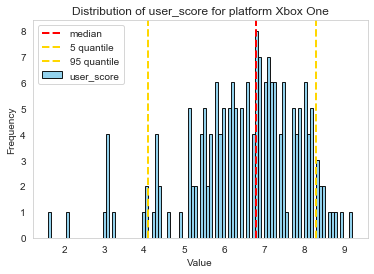

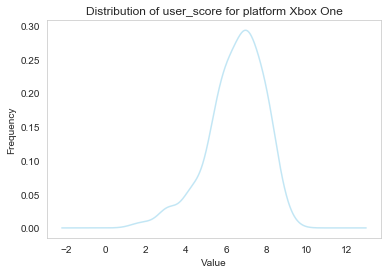

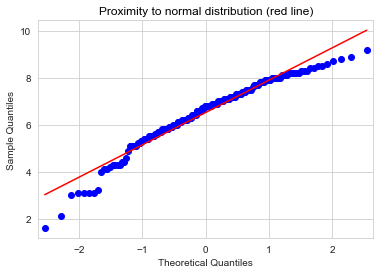

--------------------------------------------------------------


In [109]:
# charts for XOne
my_hist(games_2platf[games_2platf['platform']=='XOne'], 'user_score', 100, 'Xbox One')

The peak and median of the user_score for the Xbox One platform is around 6.8. The data distribution is not normal.

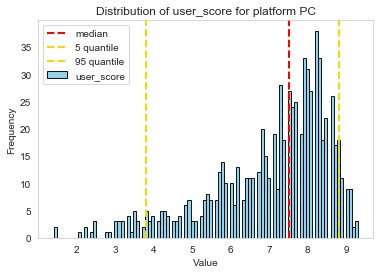

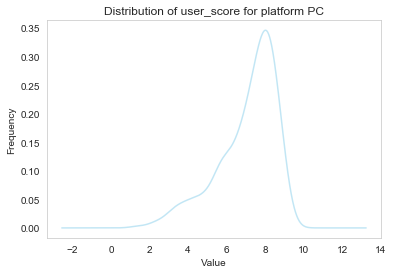

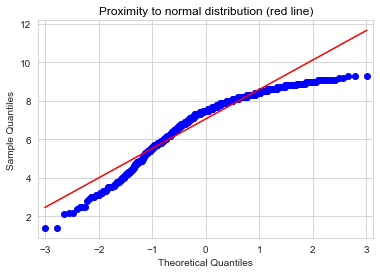

--------------------------------------------------------------


In [110]:
# charts for XOne
my_hist(games_2platf[games_2platf['platform']=='PC'], 'user_score', 100, 'PC')

The peak of the user_score for the PC platform is about 8.5, the median is about 7.5. Data is not distributed normally.

Let's check if the variances of the two samples are the same. We use the Levene's test for equality of variances.

The null and alternative hypotheses respectively:

* $H_0$: sample variances are equal; 
* $H_1$: sample variances are not equal. 

In [111]:
# Levene's test
alpha = 0.05  #significance level

results = st.levene(games_2platf[games_2platf['platform']=='XOne']['user_score'], \
                    games_2platf[games_2platf['platform']=='PC']['user_score'])
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.2795532372785057
Failed to reject the null hypothesis


We conclude that variances are equal.

Now let's formulate our main hypothesis:

* $H_0$: the average user_score of the Xbox One and PC platforms are not equal;
* $H_1$: the average user_score of the Xbox One and PC platforms are equal. 

We use the two-tailed Student's t-test, since we are testing the equality or inequality of the means of the two samples. We have enough observations, therefore, according to the CLT (Central Limit Theorem), the means of the two samples are normally distributed. We use the significance level of 5%.

In [112]:
# significance level;  
# if p-value is less than this level, we reject the null hypothesis
alpha = 0.05 

# we set parameter 'equal_var' to True, as variances are equal
# let's run a two-sided test on the equality of mean of user_score between two samples
# we set 'equal_var' parameter to True, since sample variances are equal
results = st.ttest_ind(games_2platf[games_2platf['platform']=='XOne']['user_score'], \
                       games_2platf[games_2platf['platform']=='PC']['user_score'], equal_var = True)

# show p-value
print('p-value:', results.pvalue)


# result of the hypothesis testing
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else: 
    print('Failed to reject the null hypothesis') 

p-value: 1.3037979620149106e-05
Reject the null hypothesis


We reject the null hypothesis about the inequality of the average user_score between two samples - Xbox One and PC. Average user_score are equal.

<a href="#contents">back to contents</a>

### Testing the second hypothesis

First, let's examine the mean, variance and standard deviation for the two samples - the Action genre and the Sports genre.

In [113]:
# table with Action and Sports genres with missing values in user_score filtered out 
games_2genre = games.query('user_score.notnull() and (genre=="Action" or genre=="Sports")')

In [114]:
# 2877 observations left
games_2genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 16692
Data columns (total 12 columns):
name               2877 non-null object
platform           2877 non-null object
year_of_release    2877 non-null int64
genre              2877 non-null object
na_sales           2877 non-null float64
eu_sales           2877 non-null float64
jp_sales           2877 non-null float64
other_sales        2877 non-null float64
critic_score       2595 non-null float64
user_score         2877 non-null float64
rating             2848 non-null object
total_sales        2877 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 292.2+ KB


In [115]:
# mean, standard deviation and variance of user_score 
games_2genre.pivot_table(index='genre', values='user_score', aggfunc=['mean', 'std', 'var']).round(1)

,mean,std,var
,user_score,user_score,user_score
genre,,,
Action,7.1,1.4,2.0
Sports,7.0,1.6,2.6


Averages and standard deviation do not differ much. The variance differs across the two samples.

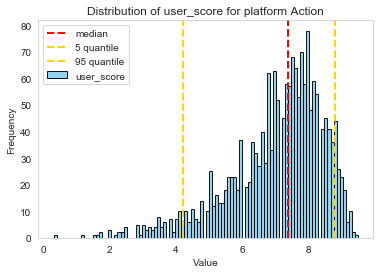

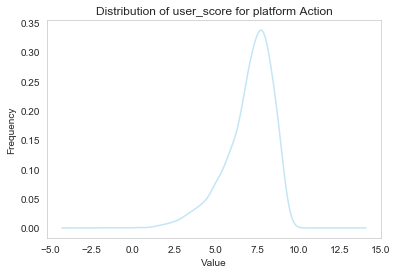

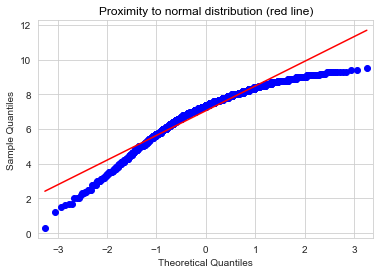

--------------------------------------------------------------


In [116]:
# charts for Action genre
my_hist(games_2genre[games_2genre['genre']=='Action'], 'user_score', 100, 'Action')

The peak of the user_score for the Action genre is about 8, the median is about 7.3. Data is not distributed normally.

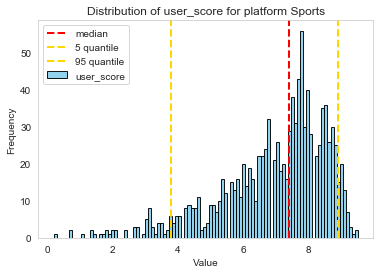

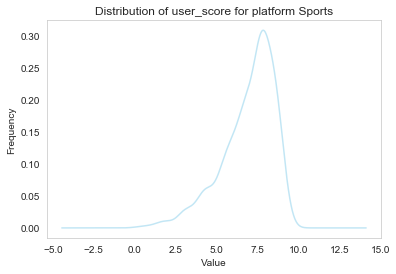

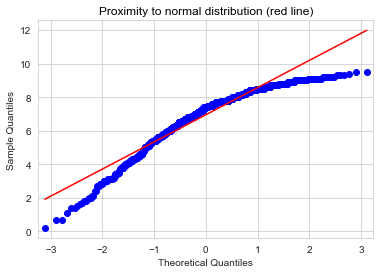

--------------------------------------------------------------


In [117]:
# charts for Action genre
my_hist(games_2genre[games_2genre['genre']=='Sports'], 'user_score', 100, 'Sports')

The peak of the user_score of Sports genre is about 7.5, the median is about 7.3. Data is not normally distributed.

Let's check if the variances of the two samples are the same. We use the Levene's test for equality of variances.

The null and alternative hypotheses respectively:

* $H_0$: sample variances are equal; 
* $H_1$: sample variances are not equal. 

In [118]:
# Levene's test
alpha = 0.05
results = st.levene(games_2genre[games_2genre['genre']=='Action']['user_score'], \
                    games_2genre[games_2genre['genre']=='Sports']['user_score'])
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 8.763985507235711e-05
Reject the null hypothesis


Variances of samples are not equal.

Now let's formulate our main hypothesis:

* $H_0$: the average user_score of the Action and Sports genres are equal;
* $H_1$: the average user_score of the Action and Sports genres are not equal. 

We use the two-tailed Student's t-test, since we are testing the equality or inequality of the means of the two samples. We have enough observations, therefore, according to the CLT (Central Limit Theorem), the means of the two samples are normally distributed. We use the significance level of 5%.

In [119]:
# significance level
alpha = 0.05 

# we set the 'equal_var' parameter to False, as variances are not equal
results = st.ttest_ind(games_2genre[games_2genre['genre']=='Action']['user_score'], \
                       games_2genre[games_2genre['genre']=='Sports']['user_score'], equal_var = False)
# show p-value
print('p-value:', results.pvalue)

# result of the hypothesis testing
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else: 
    print('Failed to reject the null hypothesis') 

p-value: 0.07370217419278534
Failed to reject the null hypothesis


We failed to reject the null hypothesis about the equality of the average user scores of the Action and Sports samples. Average user_scores are equal between the two samples.

### Conclusion
Based on hypothesis testing:
* Average user scores between the two platforms - Xbox One and PC - are equal;
* Average user scores between the two genres - Action and Sports - are equal.

<a href="#contents">back to contents</a>

## General conclusion

In this study, we analyzed data on sales of computer games. The data contains the following information: name of a game, platform, genre, year of release, user score, critics' score, ESRB rating, and sales by region - North America, Europe, Japan and other countries.

The table has 11,559 unique games, 12 unique genres, and 31 unique gaming platforms. The values in the ESRB rating column represent 8 unique age ratings. The most popular games are rated 'E' - for all ages. This is followed by the category 'T' - teenagers. Top-7 platforms by the number of games are: PS2, DS, PS3, Wii, X360, PSP and PS.

We have done some preprocessing of the data:

- Column names have been converted to lower case;
- removed observations with missing values in the name and year of release columns;
- missing values in user scores, critics' scores and ratings were left as is;
- some data types were changed;
- the 'tbd' values in the user_score column were replaced with NaN and the column was converted to a numeric type;
- two observations with 0 sales in all regions were deleted.

We identified the top-6 platforms by total sales for the entire period: PS2, X360, PS3, Wii, DS and PS. We found out that the typical platform life cycle is 10-12 years.

For the current period, we used the period 2013-2016. During this period, the PS4 and XOne platforms were leading platforms by sales and have shown growth. Sales for PS3, X360, 3DS platforms dropped significantly over this period. In general, there is a downward trend in sales across all platforms. Thus, PS4 and XOne are platforms with high potential. 

We observe a similar effect of user scores and critics' score on sales on PS4 and XOne platforms: there is a slight positive correlation between sales and critics'ratings.

Over the current period, most games sold were in the Action genre, least of games sold - in Puzzle genre. The Action genre also has the highest sales. The Puzzle genre has the lowest sales.

We have identified the most popular platforms and genres for the entire period under review. North America is dominated by the X360, PS2, Wii, PS3 and DS platforms. In Europe, PS2, PS3, X360, Wii and PS platforms are leading in sales. In Japan, the leading platforms are DS, PS, PS2, SNES and 3DS. The PS2 platform is among the top-rated platforms in all three regions. The Action genre is popular in all three regions.

Majority of games sold are 'E' age category in all three regions. 'AO' sales are a minority in North America and Europe, with no such sales made in Japan. No clear relationship was found between the ESRB rating and sales in each region.

*** At the last stage of the study, two hypotheses were tested: ***

1. Average user scores for Xbox One and PC platforms are the same;
2. Average user scores for Action and Sports genres are different.

We used two-sided Student's tests, as we test the equality or inequality of the means of the two samples. Significance level was taken as 5%. When testing hypotheses, we we take into account the variances of the samples.

* The results of the tests carried out on two hypotheses, respectively: *

**1. We reject the null hypothesis about the inequality of the average user scores of two samples - Xbox One and PC. Averages are equal;**

**2. We failed to reject the null hypothesis that the average user scores of the two samples - Action and Sports. Averages are equal.**


<div class = "alert alert-block alert-info">
<b> Our recommendation: </b>

When planning an advertising campaign for 2017, focus should be on the following parameters of computer games:
- Potentially profitable platforms are PS4 and XOne;
- profitable genres are Action, Role-Playing, Adventure, Sports and Shooter;
- games with age ratings 'E', 'M' and 'T' - for all age categories, mature (from 17 years old) and for teenagers, respectively.
    
</div>

<a href="#contents">back to contents</a>